### 1. IMPORTACIÓN DE LIBRERÍAS NECESARIAS

In [108]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. INICIALIZACIÓN DE VARIABLES

In [110]:
hostnames = []
dataset = []
df = None

### 3. CREACIÓN DE FUNCIÓN

In [112]:
# Se generan nombres aleatorios de sistemas operativos, entornos y país.
def set_hostnames(number_of_hosts: int) -> None:
    os = ['L'] * 40 + ['S'] * 30 + ['A'] * 20 + ['H'] * 10
    environment = ['D'] * 10 + ['I'] * 10 + ['T'] * 25 + ['S'] * 25 + ['P'] * 30
    countries = ['NOR'] * 6 + ['FRA'] * 9 + ['ITA'] * 16 + ['ESP'] * 16 + ['DEU'] * 23 + ['IRL'] * 30
    grupo_alpha = []

    for i in range(number_of_hosts):
        country = random.choice(countries)
        host = random.choice(os) + random.choice(environment)
        host += country
        grupo_alpha.append(host)
        host += str(grupo_alpha.count(host)).zfill(3)
        hostnames.append(host)
        


### 4. CREACIÓN DE FUNCIÓN DEL SISTEMA OPERATIVO

In [114]:
# La función tiene como parámetro un string, que dependiendo de la inicial del host, devuelve el nombre completo de este
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknown'

### 5. CREACIÓN DE FUNCIÓN DEL NOMBRE DEL ENTORNO

In [116]:
# La función tiene como parámetro un string, que dependiendo de la inicial del entorno, devuelve el nombre completo de este
def get_environment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknown'
    

### 6. CREACIÓN DE FUNCIÓN DEL NOMBRE DEL PAIS

In [118]:
# La función tiene como parámetro un string, que dependiendo de la inicial del país, devuelve el nombre completo de este
def get_country(hostname: str) -> str:
    if hostname[2:5] == 'NOR':
        return 'Norway'
    elif hostname[2:5] == 'FRA':
        return 'France'
    elif hostname[2:5] == 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    else: 
        return 'Unknown'
    


### 7. CREACIÓN DE FUNCIÓN PARA GENERAR EL DATAFRAME

In [120]:
def set_dataframe(count: int) -> None:
    global df
    
    set_hostnames(count)
    # Se crea un diccionario y se añade al dataset
    for hostname in hostnames:
        try:
            dataset.append({
                'hostname': hostname,
                'os': get_os(hostname),
                'environment': get_environment(hostname),
                'country': get_country(hostname),
                'node': int(hostname[-3:])
            })
        except ValueError:
            node = None
    # Creación del dataframe
    df = pd.DataFrame(dataset)

    
    
    

### 8. CREACIÓN DEL DATAFRAME

In [122]:
# Creación del dataframe con 1500 registros
set_dataframe(1500)

In [123]:
# Se invoca al dataframe
df

,hostname,os,environment,country,node
0,SPIRL001,Solaris,Production,Ireland,1
1,SSFRA001,Solaris,Staging,France,1
2,SDESP001,Solaris,Development,Spain,1
3,SIESP001,Solaris,Integration,Spain,1
4,AIITA001,AIX,Integration,Italy,1
...,...,...,...,...,...
1495,SSITA011,Solaris,Staging,Italy,11
1496,LINOR004,Linux,Integration,Norway,4
1497,SPESP020,Solaris,Production,Spain,20
1498,LPDEU051,Linux,Production,Germany,51


### 9. GUARDAR EL DATAFRAME EN UN FICHERO CSV

In [125]:
# Se guarda el dataframe en un archivo CSV, incluyendo el nombre de las columnas y omitiendo los índices de las filas
df.to_csv("host.csv", header = True, index = False)

In [126]:
# Se lee el archivo csv
df_host = pd.read_csv("host.csv")

host_df = pd.read_csv(r'host.csv',
                       encoding='ISO-8859-1',
                       delimiter=','
);

### 10. GRÁFICO DEL DESGLOSE DE ENTORNOS POR PAIS

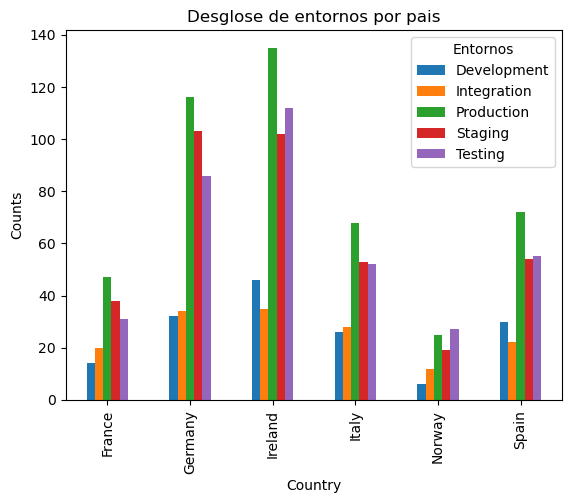

In [128]:
# Se llama a la función especificada anteriormente
host_df 

# Agrupacion por país y entorno
agrupacion = df.groupby(['country', 'environment']).size()

# Se aplica el metodo unstack para poder especificar los entornos en columnas
desapilado = agrupacion.unstack()

# Se grafica el resultado
desapilado.plot(kind = 'bar', stacked = False)

# Se definen los elementos del gráfico
plt.xlabel('Country')
plt.ylabel('Counts')
plt.title('Desglose de entornos por pais')
plt.legend(title = 'Entornos')
plt.grid(False)

# Se muestra el gráfico
plt.show()

### 11. CREACIÓN DE FIGURA EN UNA MALLA DE 2x2

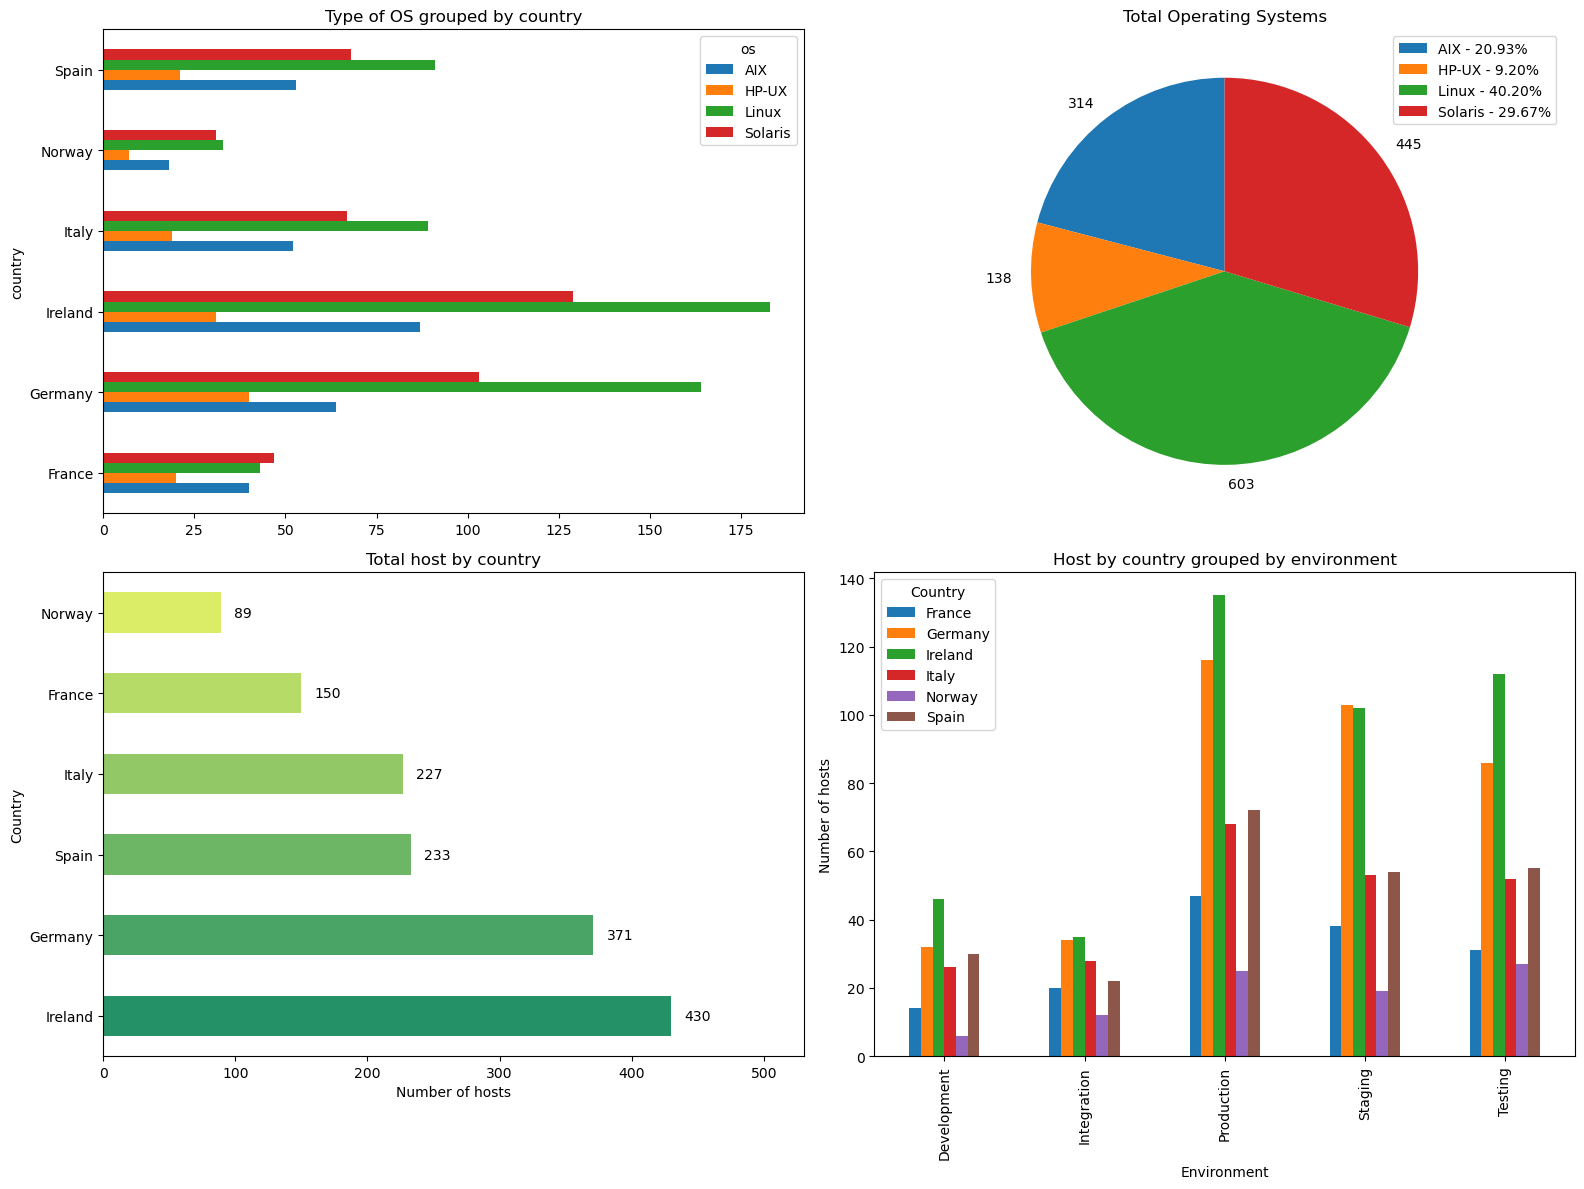

In [130]:
# Se llama a la función especificada anteriormente
host_df

# ELEMENTO 0.0 AGRUPACIÓN POR PAIS Y ENTORNO
# Agrupación por país y sistema operativo
agrupacion_pais_os = df.groupby(['country', 'os']).size()
# Se aplica el metodo unstack para poder especificar los entornos en columnas
desapilado_pais_os = agrupacion_pais_os.unstack()


# ELEMENTO 1.0 AGRUPACIÓN POR ENTORNO
# Agrupación por entorno
agrupacion_os = df.groupby('os').size()

# ELEMENTO 0.1 CANTIDAD DE HOST POR PAIS
cantidad_host_pais = df['country'].value_counts()

# ELEMENTO 1.1 HOST POR PAIS AGRUPADOS POR ENTORNO
# Agrupación por pais y entorno
agrupacion_pais_entorno = df.groupby(['environment', 'country']).size()
# Metodo unstack para poder especificar los paises en columnas
desapilado_pais_entorno = agrupacion_pais_entorno.unstack()
                                

fig, axs = plt.subplots(2, 2, figsize = (16, 12))

# GRÁFICO ELEMENTO 0.0
desapilado_pais_os.plot(kind = 'barh', stacked = False, ax = axs[0, 0])
axs[0, 0].set_title('Type of OS grouped by country')

# GRÁFICO ELEMENTO 1.0
agrupacion_os.plot.pie(labels = agrupacion_os.values, ax = axs[0, 1], startangle = 90)
axs[0, 1].set_title('Total Operating Systems')
axs[0, 1].legend(
    labels=[f'{os} - {pct:.2f}%' for os, pct in zip(agrupacion_os.index, agrupacion_os.values / agrupacion_os.sum() * 100)],
    loc='upper right', bbox_to_anchor=(1.2, 1)
)

# GRÁFICO ELEMENTO 0.1
cantidad_host_pais.plot(kind = 'barh', ax = axs[1, 0], color = sns.color_palette('summer', len(cantidad_host_pais)))
axs[1, 0].set_title('Total host by country')
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_xlabel('Number of hosts')
max_hosts = cantidad_host_pais.max() + 100
axs[1, 0].set_xlim(0, max_hosts)

for i, (value, name) in enumerate(zip(cantidad_host_pais, cantidad_host_pais.index)):
    axs[1, 0].text(value + 10, i, str(value), va='center')

# GRÁFICO ELEMENTO 1.1
desapilado_pais_entorno.plot(kind = 'bar', stacked = False, ax = axs[1, 1])
axs[1, 1].set_title('Host by country grouped by environment')
axs[1, 1].set_ylabel('Number of hosts')
axs[1, 1].set_xlabel('Environment')
axs[1, 1].legend(title = 'Country', labels=desapilado_pais_entorno.columns)

# Para ajustar automáticamente los espacios
fig.tight_layout()